<h1>Fuzzy logic steering control of autonomous vehicles inside roundabout

<b>This system is designed to determine how autonomous cars drive while entering roundabout roads</b>

The control of autonomous vehicles on the roundabout can bedivided into three stages: entrance, circulating lane, and exit. 
Different controllers are used at each stage once the roundabout is detected. 

Using the human driving experience, fuzzy logic allows us to define linguistic variables and a set of expert rules to control complex systems such as real vehicles. Fuzzy logic controllers can emulate human driver’s behavior. This methodology exploits tolerance for imprecision and uncertainty by itself. 
Indeed, driver’s experience is represented as fuzzy rules where the variables represent linguistic terms (actual speed, lateral error, etc.) and, instead of taking crisp values, they take values such as middle, high, etc.
The controller input values are transformed and interpreted as fuzzy data after the fuzzification process. Each variable is definedby several fuzzy sets which are described by membership functions associated to the corresponding linguistic labels. A fuzzy output results of the inference process applying some fuzzy rules. This fuzzy output is defuzzified to obtain a crisp value that can be applied to the real system.

Based on this knowledge, two fuzzy controllers are designed:<br>
<b>1- Steering wheel position fuzzy controller<br>
2- Angular speed fuzzy controller.</b>

The Steering position controller has two inputs, <b>the lateral error (meters) and the angular error (degrees)</b>.
The Angular speed controller are <b>the Distance to the bend (meters) andLongitudinal speed (kilometers per hour (km/h))</b>.

The values of the membership functions are calculated by running several tests with the vehicle driven by a human. Values of the two input variables, position and angular speed, were recorded when the human driver was driving the car at the roundabout.

While working on implementing this fuzzy system we have 3 main stages<br>
1- <b>Stage one:</b> Defining the antecedents and consequents of the system and assigning membership functions variables.<br>
2- <b>Stage two:</b> Defining the rules needed for building the system, since the system has two fuzzy controllers, its going to have two seperate sets of rules.<br>
3- <b>Stage three:</b> Building the control system for each fuzzy controller and initiating the proper simulation needed.<br>

<h1>Stage 1: Defining Antecedents and Consequents.

Importing librarie

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

Defining Antecedents

In [2]:
lateral_error = ctrl.Antecedent(np.arange(-10, 10, 1), 'lateral_error')
angular_error = ctrl.Antecedent(np.arange(-90, 90, 1), 'angular_error')
dis_bend = ctrl.Antecedent(np.arange(0, 100, 1), 'distance_to_bend')
act_speed = ctrl.Antecedent(np.arange(0, 90, 1), 'actual_speed')

Defining Consequents

In [3]:
steering_pos = ctrl.Consequent(np.arange(-90, 90, 1), 'steering_position')
angular_speed = ctrl.Consequent(np.arange(0, 90, 1), 'angular_speed')

<h2>Defining Fuzzy Sets for Antecedents

Lateral error sets

In [38]:
lateral_error['right'] = fuzz.trapmf(lateral_error.universe, [-10, -10, -2, 0])

lateral_error['middle'] = fuzz.trapmf(lateral_error.universe, [-1.3, -1.3, 1.2, 2])

lateral_error['left'] = fuzz.trapmf(lateral_error.universe, [0, 2, 10, 10])


c:\Users\berna\.conda\envs\ai-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


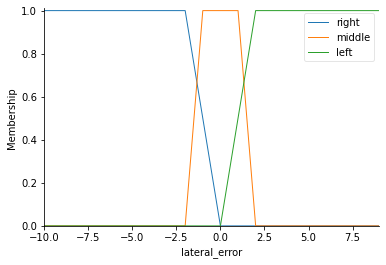

In [39]:
lateral_error.view()

Angular eroor sets

In [6]:
angular_error['right'] = fuzz.trapmf(angular_error.universe, [-90, -90, -40, 15])

angular_error['left'] = fuzz.trapmf(angular_error.universe, [-15, 40, 90, 90])

c:\Users\berna\.conda\envs\ai-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


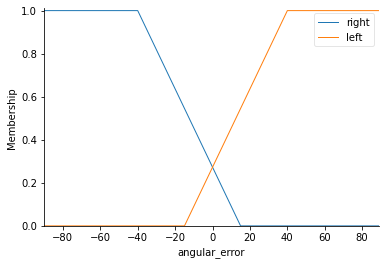

In [7]:
angular_error.view()

Distance to Bend sets

In [8]:
dis_bend['close'] = fuzz.trapmf(dis_bend.universe, [0, 0, 1, 5])

dis_bend['far'] = fuzz.trapmf(dis_bend.universe, [1, 5, 100, 100])

c:\Users\berna\.conda\envs\ai-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


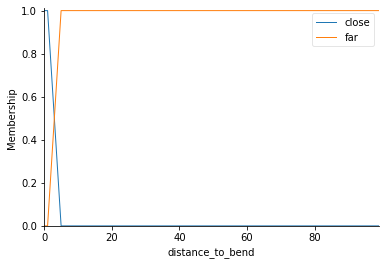

In [9]:
dis_bend.view()

Actual speed sets

In [10]:
act_speed['low'] = fuzz.trapmf(act_speed.universe, [0, 0, 2, 4])

act_speed['medium'] = fuzz.trapmf(act_speed.universe, [2, 6, 6, 10])

act_speed['high'] = fuzz.trapmf(act_speed.universe, [6, 6, 10, 90])

c:\Users\berna\.conda\envs\ai-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


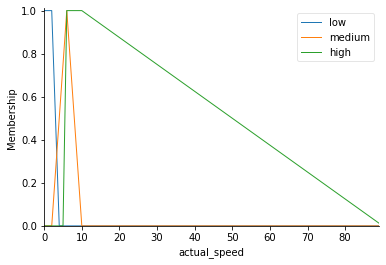

In [11]:
act_speed.view()

<h2>Defining Fuzzy Sets for Consequents

In [12]:
steering_pos['Right'] = fuzz.trapmf(steering_pos.universe, [-90, -90, -70, -45])
steering_pos['Left'] = fuzz.trapmf(steering_pos.universe, [45, 70, 90, 90])
steering_pos['Half Right'] = fuzz.trapmf(steering_pos.universe, [-70, -70, -45, 0])
steering_pos['Half Left'] = fuzz.trapmf(steering_pos.universe, [0, 45, 70, 70])

c:\Users\berna\.conda\envs\ai-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


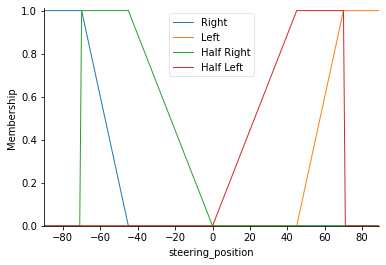

In [13]:
steering_pos.view()

In [14]:
angular_speed['Low'] = fuzz.trapmf(angular_speed.universe,[0, 0, 5, 10])
angular_speed['Medium'] = fuzz.trapmf(angular_speed.universe,[10, 10, 15, 20])
angular_speed['High'] = fuzz.trapmf(angular_speed.universe,[35, 35, 40, 60])
angular_speed['Med High'] = fuzz.trapmf(angular_speed.universe,[20, 20, 30, 35])

c:\Users\berna\.conda\envs\ai-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


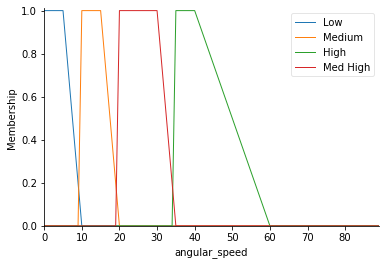

In [15]:
angular_speed.view()

<h1>Defining fuzzy controllers rules.</h1>

<h2>Steering Position Rules</h2>

IF Angular error Left THEN Steering Right

In [16]:
steer_rule_1 = ctrl.Rule(angular_error['left'], consequent=steering_pos['Right'])

IF Angullar error Right THEN Steering Left

In [17]:
steer_rule_2 = ctrl.Rule(angular_error['right'], consequent=steering_pos['Left'])

IF Lateral error Left THEN Steering Right

In [18]:
steer_rule_3 = ctrl.Rule(lateral_error['left'], consequent=steering_pos['Right'])

IF Lateral error Right THEN Steering Left

In [19]:
steer_rule_4 = ctrl.Rule(lateral_error['right'], consequent=steering_pos['Left'])

IF Lateral error Middle AND Angular error Left THEN Steering Half Right

In [20]:
steer_rule_5 = ctrl.Rule(lateral_error['middle'] & angular_error['left'], consequent=steering_pos['Half Right'])

IF Lateral error Middle AND Angular error Right THEN Steering Half Left

In [21]:
steer_rule_6 = ctrl.Rule(lateral_error['middle'] & angular_error['right'], consequent=steering_pos['Half Left'])

<h2>Angular Speed Rules:</h2>

IF Distance to Bend Close AND Longitudinal Speed Low THEN Speed Med High 

In [22]:
ang_speed_rule_1 = ctrl.Rule(dis_bend['close'] & act_speed['low'], consequent=angular_speed['Med High'])

IF Distance to Bend Close AND Longitudinal Speed Medium THEN Speed Medium 

In [23]:
ang_speed_rule_2 = ctrl.Rule(dis_bend['close'] & act_speed['medium'], consequent=angular_speed['Medium'])

IF Distance to Bend Close AND Longitudinal Speed High THEN Speed Low 

In [24]:
ang_speed_rule_3 = ctrl.Rule(dis_bend['close'] & act_speed['high'], consequent=angular_speed['Low'])

IF Distance to Bend Far AND Longitudinal Speed Low THEN Speed High 

In [25]:
ang_speed_rule_4 = ctrl.Rule(dis_bend['far'] & act_speed['low'], consequent=angular_speed['High'])

IF Distance to Bend Far AND Longitudinal Speed Medium THEN Speed Med High 

In [26]:
ang_speed_rule_5 = ctrl.Rule(dis_bend['far'] & act_speed['medium'], consequent=angular_speed['Med High'])

IF Distance to Bend Far AND Longitudinal Speed High THEN Speed Medium 

In [27]:
ang_speed_rule_6 = ctrl.Rule(dis_bend['far'] & act_speed['high'], consequent=angular_speed['Medium'])

<h1>Stage 3: Control Systems and Sumulation</h1>

<h2>Control System Creation and Simulation for Steering Position</h2>

In [28]:
steer_rules_list = [steer_rule_1, steer_rule_2, steer_rule_3, steer_rule_4, steer_rule_5, steer_rule_6,]

In [29]:
steering_position_ctrl = ctrl.ControlSystem(rules=steer_rules_list)

In order to simulate this control system, we will create a ControlSystemSimulation

In [30]:
steering_position_sim = ctrl.ControlSystemSimulation(steering_position_ctrl)

In [31]:
steering_position_sim.input['lateral_error'] = 3

steering_position_sim.input['angular_error'] = 5

steering_position_sim.compute()

-46.251023793236016


c:\Users\berna\.conda\envs\ai-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


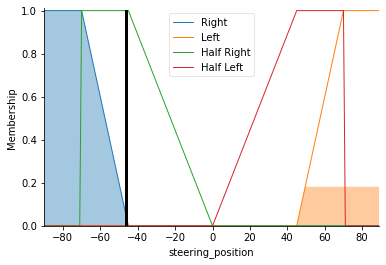

In [32]:
print(steering_position_sim.output['steering_position'])

steering_pos.view(sim = steering_position_sim)


<h2>Control system and simulation for Angular Speed</h2>

In [33]:
speed_rules_list = [ang_speed_rule_1, ang_speed_rule_2, ang_speed_rule_3, ang_speed_rule_4, ang_speed_rule_5, ang_speed_rule_6]

In [34]:
angular_speed_ctrl = ctrl.ControlSystem(rules = speed_rules_list)

In order to simulate this control system, we will create a ControlSystemSimulation

In [35]:
angular_speed_sim = ctrl.ControlSystemSimulation(angular_speed_ctrl)

In [36]:
angular_speed_sim.input['distance_to_bend'] = 3

angular_speed_sim.input['actual_speed'] = 10

angular_speed_sim.compute()

9.412764003673095


c:\Users\berna\.conda\envs\ai-env\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


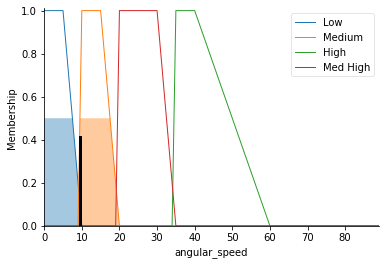

In [37]:
print(angular_speed_sim.output['angular_speed'])

angular_speed.view(sim = angular_speed_sim)